In [1]:
#!/usr/bin/env python
# coding: utf-8

import os, sys
os.environ["MALLOC_TRIM_THRESHOLD_"] = '0'

import numpy as np
import xarray as xr
import xarray.ufuncs as xu
import xrft
import pandas as pd

from matplotlib import pyplot as plt

import cartopy.crs as ccrs
import cartopy

from functionMaths import *

plt.rc("figure", figsize=(12,10))
plt.rc("font", size=14)

from dask.distributed import Client, LocalCluster
#
# Initialisation d'un cluster de 32 coeurs
cluster = LocalCluster(processes=False, n_workers=1, threads_per_worker=4, protocol = 'tcp', host = '137.129.155.67')
client = Client(cluster)
client

Matplotlib is building the font cache; this may take a moment.


Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://137.129.155.67:8787/status,
Dashboard: http://137.129.155.67:8787/status,Workers: 1
Total threads: 4,Total memory: 78.61 GiB
Status: running,Using processes: False
Comm: tcp://137.129.155.67:36775,Workers: 1
Dashboard: http://137.129.155.67:8787/status,Total threads: 4
Started: Just now,Total memory: 78.61 GiB
Comm: tcp://137.129.155.67:43255,Total threads: 4
Dashboard: http://137.129.155.67:34191/status,Memory: 78.61 GiB
Nanny: None,


In [2]:
wave_OLR = ['OLR_Rossby']
indir_data = '/cnrm/tropics/commun/DATACOMMUN/WAVE/NO_SAVE/DATA/FILTERED_ANOMALY/OLR/NAKA/'
indir_temp = '/home/durandy/temp/'
coeff = 1


In [3]:
ds = xr.open_mfdataset(indir_data + '*Rossby_SYM.nc', chunks = {'time' : 10, 'lat' : 3}, parallel = True)
ds = ds.sel(time = slice('2001','2013'))
ds

,Array,Chunk
Bytes,6.11 GiB,84.38 kiB
Shape,"(37984, 60, 360)","(10, 3, 360)"
Count,286398 Tasks,75980 Chunks
Type,float64,numpy.ndarray
,Array,Chunk
Bytes,6.11 GiB,84.38 kiB
Shape,"(37984, 60, 360)","(10, 3, 360)"
Count,286398 Tasks,75980 Chunks
Type,float64,numpy.ndarray


In [4]:
ds_plot = xr.open_mfdataset('/cnrm/tropics/commun/DATACOMMUN/WAVE/NO_SAVE/DATA/ANALYSIS/PHASE/TEMP/*OLR_Rossby_SYM.nc', 
                            chunks = {'time' : 10}, parallel = True)
# ds_plot.sel(phase = 0).to_netcdf(indir_temp + 'phase_0.nc')
# del ds_plot
# ds_plot = xr.open_mfdataset(indir_temp + 'phase_0.nc', chunks = {'time' : 1})
ds_plot = xr.where(ds_plot['magnitude'] < 1, np.nan, ds_plot)
# ds_plot['vect_x'] = np.cos(ds_plot.amplitude) * ds_plot.magnitude
# ds_plot['vect_y'] = np.sin(ds_plot.amplitude) * ds_plot.magnitude
# ds_plot = ds_plot.chunk({'time' : 1, 'lat' : -1})
ds_plot

,Array,Chunk
Bytes,195.61 GiB,2.64 MiB
Shape,"(37984, 60, 360, 32)","(10, 3, 360, 32)"
Count,455920 Tasks,75980 Chunks
Type,float64,numpy.ndarray
,Array,Chunk
Bytes,195.61 GiB,2.64 MiB
Shape,"(37984, 60, 360, 32)","(10, 3, 360, 32)"
Count,303940 Tasks,75980 Chunks
Type,float64,numpy.ndarray


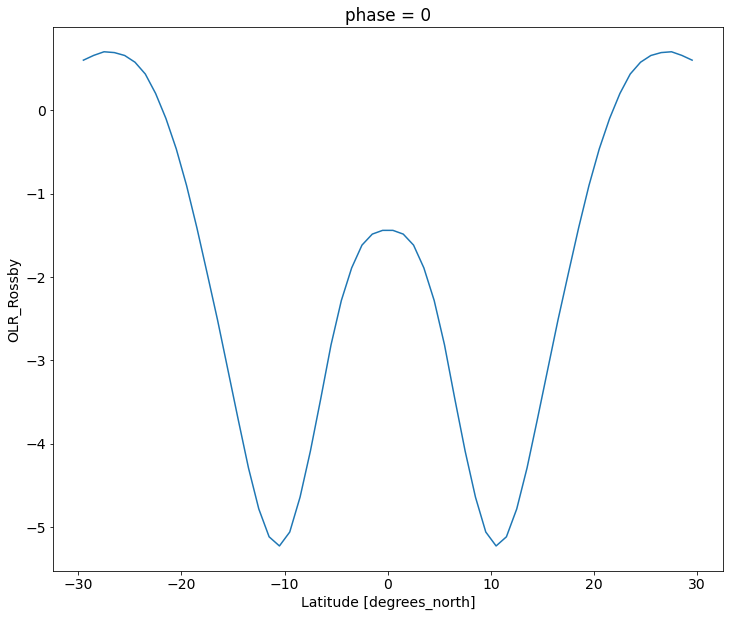

In [6]:
da = ds['OLR_Rossby'] # .sel(time=ds.time.dt.month.isin([4, 5, 6]))
# for j in range(-20,20,2):
_ds_Test = ds_plot.sel(lat = 10, method = 'nearest')
del _ds_Test['lat']
_ds_Test = _ds_Test.expand_dims(lat = ds_plot['lat'], axis = 1)
_ds_Test = _ds_Test
# _ds_2 = xr.where(_ds_Test.isnull() != True,
#                          _ds['OLR_Kelvin'].isel(phase = 0), np.nan)
da_p = da.where(_ds_Test['amplitude'].isnull() != True)
da_m = da_p.mean(dim = ['time','lon']).load()
plt.figure()
da_m.plot()
# plt.title('lat 15')
plt.show()

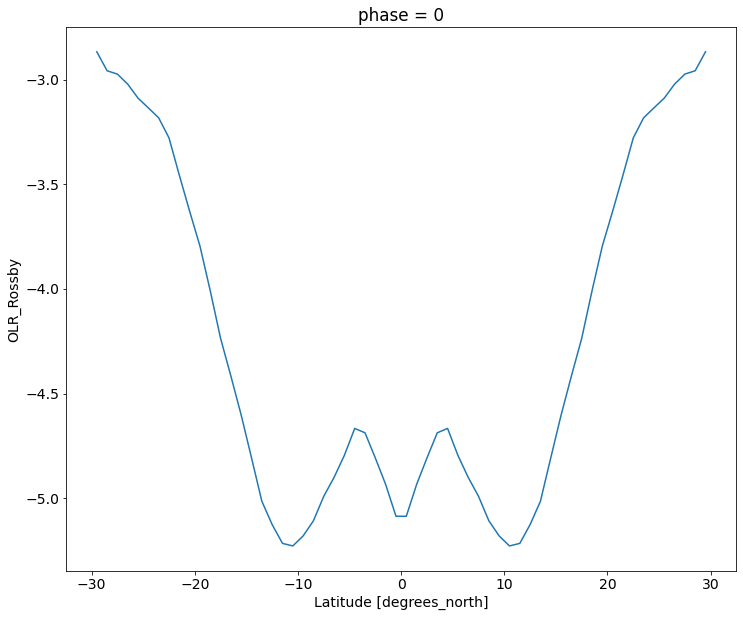

In [5]:
da = ds['OLR_Rossby'] # .sel(time=ds.time.dt.month.isin([4, 5, 6]))
# for j in range(-20,20,2):
_ds_Test = ds_plot.sel(phase = 0)
# del _ds_Test['lat']
# _ds_Test = _ds_Test.expand_dims(lat = ds_plot['lat'], axis = 1)
# _ds_Test = _ds_Test
# _ds_2 = xr.where(_ds_Test.isnull() != True,
#                          _ds['OLR_Kelvin'].isel(phase = 0), np.nan)
da_p = da.where(_ds_Test['amplitude'].isnull() != True)
da_m = da_p.mean(dim = ['time','lon']).load()
plt.figure()
da_m.plot()
# plt.title('lat 15')
plt.show()

In [12]:
_ds_3 = da.expand_dims(phase = _ds_Test['phase'], axis = 3)
_ds_3 = da.where(_ds_Test.isnull() != True)
_ds_3


,Array,Chunk
Bytes,4.23 GiB,5.27 MiB
Shape,"(822, 60, 360, 32)","(1, 60, 360, 32)"
Count,13154 Tasks,822 Chunks
Type,float64,numpy.ndarray


In [6]:
_ds_3 = ds['OLR_Rossby'].expand_dims(phase = ds_plot['phase'], axis = 3)

_ds_Test = ds_plot['amplitude'].sel(lat = 10, method = 'nearest')
del _ds_Test['lat']
_ds_Test = _ds_Test.expand_dims(lat = ds['lat'], axis = 1)

_ds_3 = xr.where(_ds_Test.isnull() != True,
                         _ds_3, np.nan)
_ds_3 = _ds_3.mean(dim = ['time','lon']).compute()

ds_4 = _ds_3.assign_coords(phase = ((_ds_3.phase + 8) % 32) - 8).sortby('phase')
ds_4

positions = (-8, 0, 7, 15, 23)
labels = ("$-\pi$", "$-\pi/2$", "0", "$\pi/2$", "$\pi$" )

plt.figure()
ds_4.plot.contourf(levels = 100)
plt.xticks(positions, labels)

/home/durandy/miniconda3/envs/towel/lib/python3.9/site-packages/dask/array/core.py:4458: PerformanceWarning: Increasing number of chunks by factor of 33
  result = blockwise(
distributed.worker - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 55.03 GiB -- Worker memory limit: 78.61 GiB
distributed.worker - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 55.05 GiB -- Worker memory limit: 78.61 GiB
distributed.worker - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 55.05

distributed.worker - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 55.32 GiB -- Worker memory limit: 78.61 GiB
distributed.worker - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 55.33 GiB -- Worker memory limit: 78.61 GiB
distributed.worker - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 55.34 GiB -- Worker memory limit: 78.61 GiB
distributed.worker - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS

distributed.worker - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 55.59 GiB -- Worker memory limit: 78.61 GiB
distributed.worker - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 55.60 GiB -- Worker memory limit: 78.61 GiB
distributed.worker - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 55.61 GiB -- Worker memory limit: 78.61 GiB
distributed.worker - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS

distributed.worker - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 55.86 GiB -- Worker memory limit: 78.61 GiB
distributed.worker - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 55.87 GiB -- Worker memory limit: 78.61 GiB
distributed.worker - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 55.89 GiB -- Worker memory limit: 78.61 GiB
distributed.worker - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS

distributed.worker - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 56.15 GiB -- Worker memory limit: 78.61 GiB
distributed.worker - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 56.16 GiB -- Worker memory limit: 78.61 GiB
distributed.worker - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 56.18 GiB -- Worker memory limit: 78.61 GiB
distributed.worker - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS

distributed.worker - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 56.41 GiB -- Worker memory limit: 78.61 GiB
distributed.worker - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 56.43 GiB -- Worker memory limit: 78.61 GiB
distributed.worker - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 56.44 GiB -- Worker memory limit: 78.61 GiB
distributed.worker - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS

distributed.worker - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 56.69 GiB -- Worker memory limit: 78.61 GiB
distributed.worker - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 56.69 GiB -- Worker memory limit: 78.61 GiB
distributed.worker - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 56.70 GiB -- Worker memory limit: 78.61 GiB
distributed.worker - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS

distributed.worker - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 56.94 GiB -- Worker memory limit: 78.61 GiB
distributed.worker - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 56.95 GiB -- Worker memory limit: 78.61 GiB
distributed.worker - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 56.95 GiB -- Worker memory limit: 78.61 GiB
distributed.worker - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS

MemoryError: 

In [ ]:
_ds_3 = ds['OLR_Rossby'].expand_dims(phase = ds_plot['phase'], axis = 3)

_ds_Test = ds_plot['amplitude']
del _ds_Test['lat']
_ds_Test = _ds_Test.expand_dims(lat = ds['lat'], axis = 1)

_ds_3 = xr.where(_ds_Test.isnull() != True,
                         _ds_3, np.nan)
_ds_3 = _ds_3.mean(dim = ['time','lon']).compute()

ds_4 = _ds_3.assign_coords(phase = ((_ds_3.phase + 8) % 32) - 8).sortby('phase')
ds_4

positions = (-8, 0, 7, 15, 23)
labels = ("$-\pi$", "$-\pi/2$", "0", "$\pi/2$", "$\pi$" )

plt.figure()
ds_4.plot.contourf(levels = 100)
plt.xticks(positions, labels)

In [5]:
indir_data = '/cnrm/tropics/commun/DATACOMMUN/WAVE/NO_SAVE/DATA/RAW_ANOMALY/OLR/'
ds = xr.open_mfdataset(indir_data + 'anom_OLR_brut_ERA5_*.nc', chunks = {'time' : 10}, parallel = True)
ds = ds.sel(time = slice('2001','2013'))
indir_data = '/cnrm/tropics/commun/DATACOMMUN/WAVE/NO_SAVE/DATA/RAW_ANOMALY/u/'
ds_u = xr.open_mfdataset(indir_data + '*z850*.nc', chunks = {'time' : 10}, parallel = True)
ds_u = ds_u.sel(time = slice('2001','2013'), latitude = slice(30,-30))
ds_u = ds_u.isel(latitude = slice(2,None,4), longitude = slice(2,None,4))
ds_u = ds_u.rename({'latitude' : 'lat', 'longitude' : 'lon'})
indir_data = '/cnrm/tropics/commun/DATACOMMUN/WAVE/NO_SAVE/DATA/RAW_ANOMALY/v/'
ds_v = xr.open_mfdataset(indir_data + '*z850*.nc', chunks = {'time' : 10}, parallel = True)
ds_v = ds_v.sel(time = slice('2001','2013'), latitude = slice(30,-30))
ds_v = ds_v.isel(latitude = slice(2,None,4), longitude = slice(2,None,4))
ds_v = ds_v.rename({'latitude' : 'lat', 'longitude' : 'lon'})


ds_v = ds_v.reindex(lat=list(reversed(ds_v.lat)))
ds_u = ds_u.reindex(lat=list(reversed(ds_u.lat)))

ds_v

/home/durandy/miniconda3/envs/towel/lib/python3.9/site-packages/xarray/core/indexing.py:1227: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]
/home/durandy/miniconda3/envs/towel/lib/python3.9/site-packages/xarray/core/indexing.py:1227: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key

,Array,Chunk
Bytes,6.11 GiB,1.65 MiB
Shape,"(37984, 1, 60, 360)","(10, 1, 60, 360)"
Count,29548 Tasks,3799 Chunks
Type,float64,numpy.ndarray


In [6]:
_ds_3 = ds['OLR_ano'].expand_dims(phase = ds_plot['phase'], axis = 3)
_ds_v = ds_v['v_ano'].expand_dims(phase = ds_plot['phase'], axis = 3)
_ds_u = ds_u['u_ano'].expand_dims(phase = ds_plot['phase'], axis = 3)


_ds_Test = ds_plot['amplitude'].sel(lat = 10, method = 'nearest')
del _ds_Test['lat']
_ds_Test = _ds_Test.expand_dims(lat = ds['lat'], axis = 1)


_ds_3 = xr.where(_ds_Test.isnull() != True,
                         _ds_3, np.nan)
_ds_3 = _ds_3.mean(dim = ['time','lon']).compute()
_ds_3 = _ds_3.assign_coords(phase = ((_ds_3.phase + 24) % 32) - 24).sortby('phase')

####################################""
_ds_u = xr.where(_ds_Test.isnull() != True,
                         _ds_u, np.nan)
_ds_u = _ds_u.mean(dim = ['time','lon'])
_ds_u = _ds_u.assign_coords(phase = ((_ds_u.phase + 24) % 32) - 24).sortby('phase')
#########################################
_ds_v = xr.where(_ds_Test.isnull() != True,
                         _ds_v, np.nan)

_ds_v = _ds_v.mean(dim = ['time','lon'])
_ds_v = _ds_v.assign_coords(phase = ((_ds_v.phase + 24) % 32) - 24).sortby('phase')

_ds_u.name = 'u'
_ds_v.name = 'v'
_ds_dyn = xr.merge([_ds_u,_ds_v]).compute()
_ds_dyn


<xarray.Dataset>
Dimensions:  (lat: 60, phase: 32, level: 1)
Coordinates:
  * lat      (lat) float32 -29.5 -28.5 -27.5 -26.5 -25.5 ... 26.5 27.5 28.5 29.5
  * phase    (phase) int64 -24 -23 -22 -21 -20 -19 -18 -17 ... 0 1 2 3 4 5 6 7
  * level    (level) int32 850
Data variables:
    u        (lat, phase, level) float64 -0.0861 -0.05416 ... 0.07916 0.1103
    v        (lat, phase, level) float64 0.08272 0.09498 ... -0.04823 -0.03319

([<matplotlib.axis.XTick at 0x7fae0a239490>,
 [Text(-24, 0, '$-\\pi$'),
  Text(-16, 0, '$-\\pi/2$'),
  Text(-8, 0, '0'),
  Text(0, 0, '$\\pi/2$'),
  Text(7, 0, '$\\pi$')])

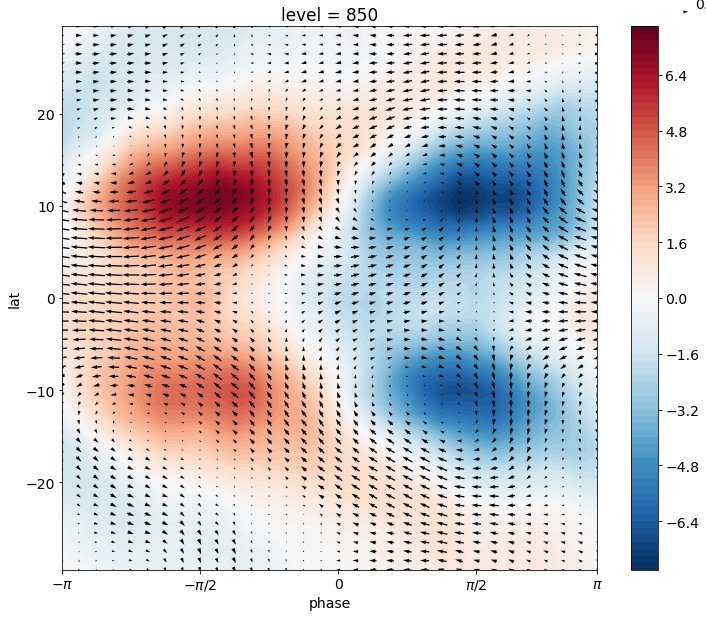

In [9]:

positions = (-24, -16, -8, 0, 7)
labels = ("$-\pi$", "$-\pi/2$", "0", "$\pi/2$", "$\pi$" )

plt.figure()
_ds_3.plot.contourf(levels = 100)
_ds_dyn.isel(level = 0).plot.quiver(x="phase", y="lat", u="u", v="v")
plt.xticks(positions, labels)

In [10]:
indir_data = '/cnrm/tropics/commun/DATACOMMUN/WAVE/NO_SAVE/DATA/RAW_ANOMALY/OLR/'
ds = xr.open_mfdataset(indir_data + 'anom_OLR_brut_ERA5_*.nc', chunks = {'time' : 10}, parallel = True)
ds = ds.sel(time = slice('2001','2013'))
indir_data = '/cnrm/tropics/commun/DATACOMMUN/WAVE/NO_SAVE/DATA/RAW_ANOMALY/u/'
ds_u = xr.open_mfdataset(indir_data + '*z200*.nc', chunks = {'time' : 10}, parallel = True)
ds_u = ds_u.sel(time = slice('2001','2013'), latitude = slice(30,-30))
ds_u = ds_u.isel(latitude = slice(2,None,4), longitude = slice(2,None,4))
ds_u = ds_u.rename({'latitude' : 'lat', 'longitude' : 'lon'})
indir_data = '/cnrm/tropics/commun/DATACOMMUN/WAVE/NO_SAVE/DATA/RAW_ANOMALY/v/'
ds_v = xr.open_mfdataset(indir_data + '*z200*.nc', chunks = {'time' : 10}, parallel = True)
ds_v = ds_v.sel(time = slice('2001','2013'), latitude = slice(30,-30))
ds_v = ds_v.isel(latitude = slice(2,None,4), longitude = slice(2,None,4))
ds_v = ds_v.rename({'latitude' : 'lat', 'longitude' : 'lon'})


ds_v = ds_v.reindex(lat=list(reversed(ds_v.lat)))
ds_u = ds_u.reindex(lat=list(reversed(ds_u.lat)))

_ds_3 = ds['OLR_ano'].expand_dims(phase = ds_plot['phase'], axis = 3)
_ds_v = ds_v['v_ano'].expand_dims(phase = ds_plot['phase'], axis = 3)
_ds_u = ds_u['u_ano'].expand_dims(phase = ds_plot['phase'], axis = 3)


_ds_Test = ds_plot['amplitude'].sel(lat = 10, method = 'nearest')
del _ds_Test['lat']
_ds_Test = _ds_Test.expand_dims(lat = ds['lat'], axis = 1)


_ds_3 = xr.where(_ds_Test.isnull() != True,
                         _ds_3, np.nan)
_ds_3 = _ds_3.mean(dim = ['time','lon']).compute()
_ds_3 = _ds_3.assign_coords(phase = ((_ds_3.phase + 24) % 32) - 24).sortby('phase')

####################################""
_ds_u = xr.where(_ds_Test.isnull() != True,
                         _ds_u, np.nan)
_ds_u = _ds_u.mean(dim = ['time','lon'])
_ds_u = _ds_u.assign_coords(phase = ((_ds_u.phase + 24) % 32) - 24).sortby('phase')
#########################################
_ds_v = xr.where(_ds_Test.isnull() != True,
                         _ds_v, np.nan)

_ds_v = _ds_v.mean(dim = ['time','lon'])
_ds_v = _ds_v.assign_coords(phase = ((_ds_v.phase + 24) % 32) - 24).sortby('phase')

_ds_u.name = 'u'
_ds_v.name = 'v'
_ds_dyn = xr.merge([_ds_u,_ds_v]).compute()


positions = (-24, -16, -8, 0, 7)
labels = ("$-\pi$", "$-\pi/2$", "0", "$\pi/2$", "$\pi$" )

plt.figure()
_ds_3.plot.contourf(levels = 100)
_ds_dyn.isel(level = 0).plot.quiver(x="phase", y="lat", u="u", v="v")
plt.xticks(positions, labels)



/home/durandy/miniconda3/envs/towel/lib/python3.9/site-packages/xarray/core/indexing.py:1227: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]
/home/durandy/miniconda3/envs/towel/lib/python3.9/site-packages/xarray/core/indexing.py:1227: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key

ValueError: indexes along dimension 'time' are not equal

In [ ]:
indir_data = '/cnrm/tropics/commun/DATACOMMUN/WAVE/NO_SAVE/DATA/RAW_ANOMALY/OLR/'
ds = xr.open_mfdataset(indir_data + 'anom_OLR_brut_ERA5_*.nc', chunks = {'time' : 10}, parallel = True)
ds = ds.sel(time = slice('2001','2013'))
indir_data = '/cnrm/tropics/commun/DATACOMMUN/WAVE/NO_SAVE/DATA/RAW_ANOMALY/vo/'
ds_u = xr.open_mfdataset(indir_data + '*z200*.nc', chunks = {'time' : 10}, parallel = True)
ds_u = ds_u.sel(time = slice('2001','2013'), latitude = slice(30,-30))
ds_u = ds_u.isel(latitude = slice(2,None,4), longitude = slice(2,None,4))
ds_u = ds_u.rename({'latitude' : 'lat', 'longitude' : 'lon'})

ds_u = ds_u.reindex(lat=list(reversed(ds_u.lat)))

_ds_3 = ds['OLR_ano'].expand_dims(phase = ds_plot['phase'], axis = 3)
_ds_u = ds_u['u_ano'].expand_dims(phase = ds_plot['phase'], axis = 3)


_ds_Test = ds_plot['amplitude'].sel(lat = 10, method = 'nearest')
del _ds_Test['lat']
_ds_Test = _ds_Test.expand_dims(lat = ds['lat'], axis = 1)


_ds_3 = xr.where(_ds_Test.isnull() != True,
                         _ds_3, np.nan)
_ds_3 = _ds_3.mean(dim = ['time','lon']).compute()
_ds_3 = _ds_3.assign_coords(phase = ((_ds_3.phase + 24) % 32) - 24).sortby('phase')

####################################""
_ds_u = xr.where(_ds_Test.isnull() != True,
                         _ds_u, np.nan)
_ds_u = _ds_u.mean(dim = ['time','lon'])
_ds_u = _ds_u.assign_coords(phase = ((_ds_u.phase + 24) % 32) - 24).sortby('phase')
#########################################
_ds_u.name = 'vo'

positions = (-24, -16, -8, 0, 7)
labels = ("$-\pi$", "$-\pi/2$", "0", "$\pi/2$", "$\pi$" )

plt.figure()
_ds_3.plot.contourf(levels = 100)
_ds_u.isel(level = 0).plot.contour.plot.quiver(levels = 10, add_labels = True)
plt.xticks(positions, labels)



In [ ]:
indir_data = '/cnrm/tropics/commun/DATACOMMUN/WAVE/NO_SAVE/DATA/RAW_ANOMALY/OLR/'
ds = xr.open_mfdataset(indir_data + 'anom_OLR_brut_ERA5_*.nc', chunks = {'time' : 10}, parallel = True)
ds = ds.sel(time = slice('2001','2013'))
indir_data = '/cnrm/tropics/commun/DATACOMMUN/WAVE/NO_SAVE/DATA/RAW_ANOMALY/vo/'
ds_u = xr.open_mfdataset(indir_data + '*z850*.nc', chunks = {'time' : 10}, parallel = True)
ds_u = ds_u.sel(time = slice('2001','2013'), latitude = slice(30,-30))
ds_u = ds_u.isel(latitude = slice(2,None,4), longitude = slice(2,None,4))
ds_u = ds_u.rename({'latitude' : 'lat', 'longitude' : 'lon'})

ds_u = ds_u.reindex(lat=list(reversed(ds_u.lat)))

_ds_3 = ds['OLR_ano'].expand_dims(phase = ds_plot['phase'], axis = 3)
_ds_u = ds_u['u_ano'].expand_dims(phase = ds_plot['phase'], axis = 3)


_ds_Test = ds_plot['amplitude'].sel(lat = 10, method = 'nearest')
del _ds_Test['lat']
_ds_Test = _ds_Test.expand_dims(lat = ds['lat'], axis = 1)


_ds_3 = xr.where(_ds_Test.isnull() != True,
                         _ds_3, np.nan)
_ds_3 = _ds_3.mean(dim = ['time','lon']).compute()
_ds_3 = _ds_3.assign_coords(phase = ((_ds_3.phase + 24) % 32) - 24).sortby('phase')

####################################""
_ds_u = xr.where(_ds_Test.isnull() != True,
                         _ds_u, np.nan)
_ds_u = _ds_u.mean(dim = ['time','lon'])
_ds_u = _ds_u.assign_coords(phase = ((_ds_u.phase + 24) % 32) - 24).sortby('phase')
#########################################
_ds_u.name = 'vo'

positions = (-24, -16, -8, 0, 7)
labels = ("$-\pi$", "$-\pi/2$", "0", "$\pi/2$", "$\pi$" )

plt.figure()
_ds_3.plot.contourf(levels = 100)
_ds_u.isel(level = 0).plot.contour.plot.quiver(levels = 10, add_labels = True)
plt.xticks(positions, labels)
